<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_010_variance_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
# iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### **Question**  
Do the variances of `petal length` differ significantly between `versicolor` and `virginica`?

---

### **F-Test for Equality of Variances**  
- **Null Hypothesis (\(H_0\))**: The variances of `petal length` for `versicolor` and `virginica` are equal.  
- **Alternative Hypothesis (\(H_1\))**: The variances of `petal length` for `versicolor` and `virginica` are not equal.  

---

### **Analysis and Interpretation**  
- The boxplot shows the variability in `petal length` for `versicolor` and `virginica`, with visible differences in the spread of values between the two groups.  
- The test statistic (\(158.86\)) indicates a significant deviation in variances between the two groups.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that the variances of `petal length` for `versicolor` and `virginica` are significantly different.  


F-Test for Equality of Variances:
Test Statistic: 158.86
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Variances differ significantly between the two groups.




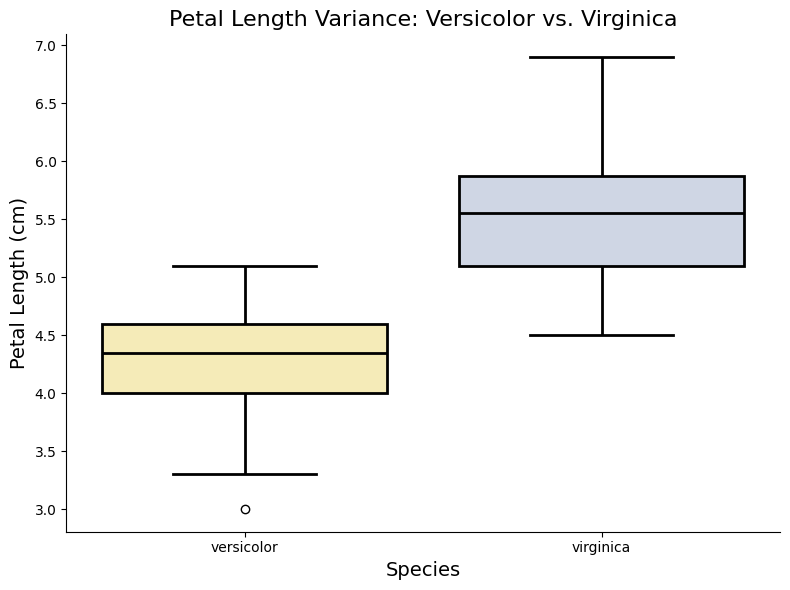

In [ ]:
from scipy.stats import f_oneway

# Extract petal length data for the two species
versicolor_petal_length = iris_df[iris_df['species'] == 'versicolor']['petal length (cm)']
virginica_petal_length = iris_df[iris_df['species'] == 'virginica']['petal length (cm)']

# Perform F-Test (ANOVA for two groups)
stat, p_value = f_oneway(versicolor_petal_length, virginica_petal_length)

# Output results
print("F-Test for Equality of Variances:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. Variances differ significantly between the two groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in variances between the two groups.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df[iris_df['species'].isin(['versicolor', 'virginica'])],
            x='species', y='petal length (cm)', hue='species', palette="Pastel2_r", linewidth=2, linecolor='k')
plt.title("Petal Length Variance: Versicolor vs. Virginica", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Petal Length (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


Based on the **F-Test for Equality of Variances**, where the null hypothesis was rejected (\(p = 0.0000\)), we’ve determined that the **variances of petal length differ significantly between `versicolor` and `virginica`**. This result impacts how we approach further analysis, particularly if the goal is to compare group means.

---

### **Next Steps**

#### **1. Adjust for Unequal Variances**
Since the variances differ significantly, a **Welch’s t-test** (for two groups) or **Welch’s ANOVA** (for more than two groups) should be used to compare the means. These methods are robust to unequal variances.

---

#### **2. Perform Welch’s t-Test**
If you’re only comparing the means of these two groups (`versicolor` and `virginica`), Welch’s t-test is the appropriate choice.

---

#### **3. Visualize the Data**
Visualization helps clarify the differences between the groups in terms of both **means** and **variances**.

---

#### **4. Consider Effect Size**
If Welch’s t-test finds a significant difference, calculate the **effect size (Cohen’s \(d\))** to quantify the magnitude of the difference between the means.


---

### **5. Broader Context**
If this analysis is part of a larger study:
- Extend the comparison to all three species using Welch’s ANOVA.
- Use post-hoc methods like the Games-Howell test to identify pairwise differences if Welch’s ANOVA is significant.




In [ ]:
from scipy.stats import ttest_ind

# Perform Welch's t-test
t_stat, p_value = ttest_ind(versicolor_petal_length, virginica_petal_length, equal_var=False)

# Output results
print("Welch's T-Test Results:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The means of petal length differ significantly between the two groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in means.")

Welch's T-Test Results:
T-Statistic: -12.60
P-Value: 0.0000
Conclusion: Reject the null hypothesis. The means of petal length differ significantly between the two groups.


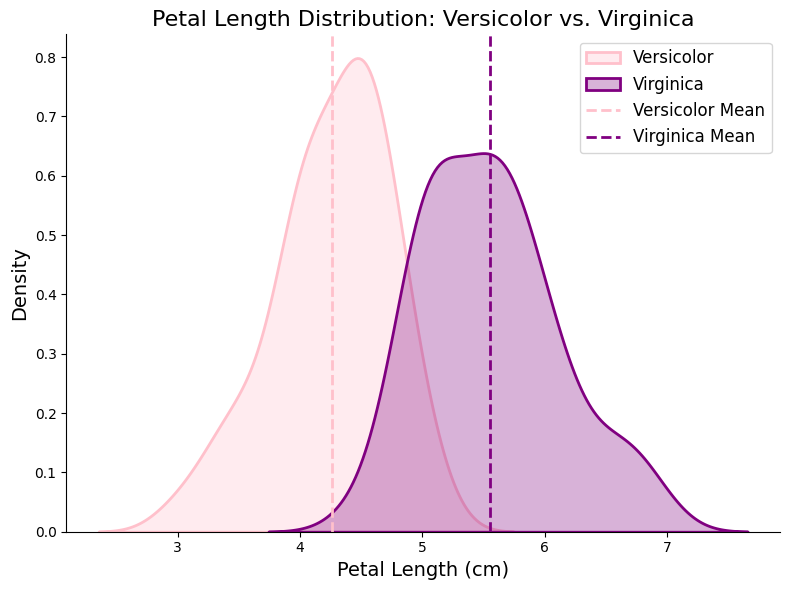

In [ ]:
# KDE Plot for Group Comparisons
plt.figure(figsize=(8, 6))
sns.kdeplot(versicolor_petal_length, fill=True, alpha=0.3, linewidth=2, label="Versicolor", color="pink")
sns.kdeplot(virginica_petal_length, fill=True, alpha=0.3, linewidth=2, label="Virginica", color="purple")

# Add vertical lines for the means of each group
plt.axvline(x=versicolor_petal_length.mean(), color="pink", linestyle="--", linewidth=2, label="Versicolor Mean")
plt.axvline(x=virginica_petal_length.mean(), color="purple", linestyle="--", linewidth=2, label="Virginica Mean")

# Customize the plot
plt.title("Petal Length Distribution: Versicolor vs. Virginica", fontsize=16)
plt.xlabel("Petal Length (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Calculate Cohen's d
mean_diff = versicolor_petal_length.mean() - virginica_petal_length.mean()
pooled_sd = np.sqrt(((versicolor_petal_length.std() ** 2) + (virginica_petal_length.std() ** 2)) / 2)
cohens_d = mean_diff / pooled_sd

print(f"Cohen's d: {cohens_d:.2f}")

Cohen's d: -2.52


In [ ]:
# !pip install pingouin

In [ ]:
import pingouin as pg

# Perform Welch's ANOVA
welch_anova = pg.welch_anova(dv='petal length (cm)', between='species', data=iris_df[iris_df['species'].isin(['versicolor', 'virginica'])])

# Output Welch's ANOVA Results
print("Welch's ANOVA Results:")
print(welch_anova)

# Perform Games-Howell post-hoc test
games_howell = pg.pairwise_gameshowell(dv='petal length (cm)', between='species', data=iris_df[iris_df['species'].isin(['versicolor', 'virginica'])])

# Output Games-Howell Results
print("Games-Howell Post-Hoc Results:")
games_howell


Welch's ANOVA Results:
    Source  ddof1      ddof2           F         p-unc       np2
0  species      1  95.570435  158.855256  4.900288e-22  0.618462
Games-Howell Post-Hoc Results:


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,versicolor,virginica,4.26,5.552,-1.292,0.102509,-12.603779,95.570435,0.0,-2.501415
